In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("iris_dataset_2D.csv")
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X

,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


### DBSCAN

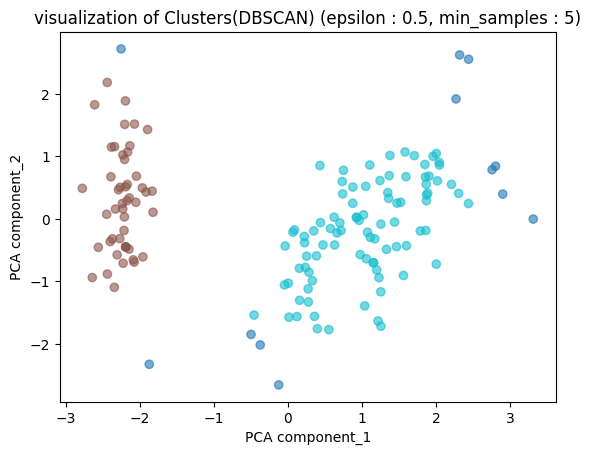


Overall Purity Score: 63.3333


In [3]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(X)
cluster_labels = dbscan.labels_
num_clusters = len(pd.Series(cluster_labels).value_counts())

plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c = cluster_labels,cmap='tab10',alpha=0.6)
plt.title(f'visualization of Clusters(DBSCAN) (epsilon : 0.5, min_samples : 5)')
plt.xlabel('PCA component_1')
plt.ylabel('PCA component_2')
plt.show()

total = 0
for cluster_id in range(num_clusters-1):
    cluster_indices = np.where(cluster_id == cluster_labels)[0]
    true_labels = y[cluster_indices]

    most_freq = true_labels.mode()[0]
    freq = (most_freq == true_labels).sum()

    total += freq 

purity_score = (float(total/len(X))*100)

print(f'\nOverall Purity Score: {purity_score:.4f}')

##### Purity Score for K-Means (clusters=4) = 84.67  
##### Purity Score for K-Medoids (clusters=4) = 84.00  
##### Purity Score for DBSCAN (epsilon : 0.5, min_samples : 5) = 63.33  

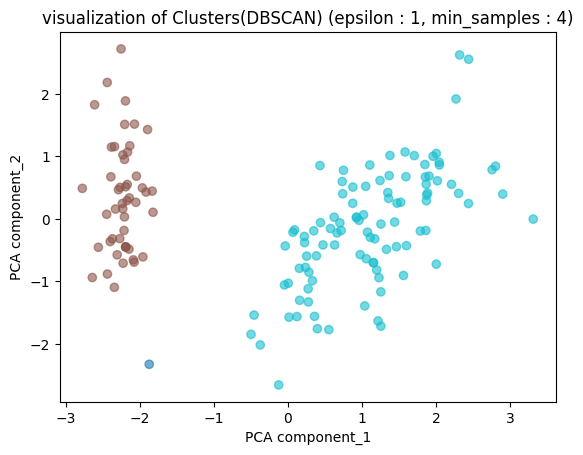

Cluster 0: 
Most frequent element : Iris-setosa  
Frequency: 49 
Purity Score : 1.0000
Cluster 1: 
Most frequent element : Iris-versicolor  
Frequency: 50 
Purity Score : 0.5000

Overall Purity Score: 66.0000
-----------------------------------------------------------------------------------------------------------------------


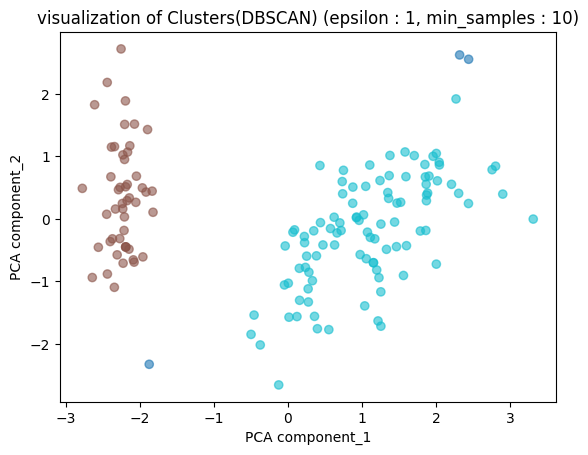

Cluster 0: 
Most frequent element : Iris-setosa  
Frequency: 49 
Purity Score : 1.0000
Cluster 1: 
Most frequent element : Iris-versicolor  
Frequency: 50 
Purity Score : 0.5102

Overall Purity Score: 66.0000
-----------------------------------------------------------------------------------------------------------------------


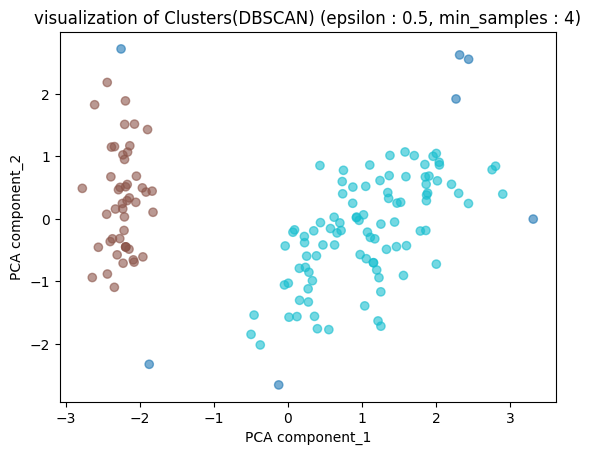

Cluster 0: 
Most frequent element : Iris-setosa  
Frequency: 48 
Purity Score : 1.0000
Cluster 1: 
Most frequent element : Iris-versicolor  
Frequency: 49 
Purity Score : 0.5158

Overall Purity Score: 64.6667
-----------------------------------------------------------------------------------------------------------------------


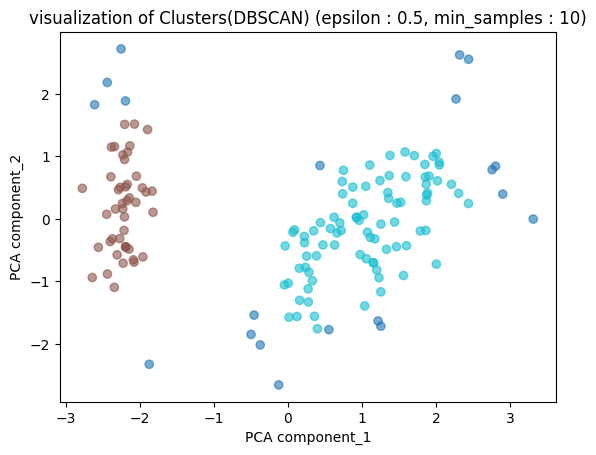

Cluster 0: 
Most frequent element : Iris-setosa  
Frequency: 45 
Purity Score : 1.0000
Cluster 1: 
Most frequent element : Iris-versicolor  
Frequency: 43 
Purity Score : 0.5059

Overall Purity Score: 58.6667
-----------------------------------------------------------------------------------------------------------------------


In [7]:
eps_list = [1,0.5]
min_samples = [4,10]
for e in eps_list:
    for m in min_samples:
        dbscan = DBSCAN(eps = e, min_samples = m).fit(X)
        cluster_labels = dbscan.labels_
        num_clusters = len(pd.Series(cluster_labels).value_counts())
        
        plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c = cluster_labels,cmap='tab10',alpha=0.6)
        plt.title(f'visualization of Clusters(DBSCAN) (epsilon : {e}, min_samples : {m})')
        plt.xlabel('PCA component_1')
        plt.ylabel('PCA component_2')
        plt.show()
        
        total = 0
        for cluster_id in range(num_clusters-1):
            cluster_indices = np.where(cluster_id == cluster_labels)[0]
            true_labels = y[cluster_indices]
        
            most_freq = true_labels.mode()[0]
            freq = (most_freq == true_labels).sum()
        
            total += freq 
            print(f'Cluster {cluster_id}: \nMost frequent element : {most_freq}  \nFrequency: {freq} \nPurity Score : {float(freq/len(true_labels)):.4f}')
        
        purity_score = (float(total/len(X))*100)
                
        print(f'\nOverall Purity Score: {purity_score:.4f}')
        print("-----------------------------------------------------------------------------------------------------------------------")